In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
dados = pd.read_csv('/content/dados_tratado.csv')

In [9]:
dados.head()

,ID_Cliente,Cancelou,Genero,Idoso,Possui_Conjuge,Possui_Dependentes,Meses_Permanencia,Servico_Telefone,Multiplas_Linhas,Tipo_Internet,...,Backup_Online,Protecao_Dispositivo,Suporte_Tecnico,Streaming_TV,Streaming_Filmes,Tipo_Contrato,Fatura_Digital,Metodo_Pagamento,Cobranca_Mensal,Cobranca_Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


In [10]:
dados.columns

Index(['ID_Cliente', 'Cancelou', 'Genero', 'Idoso', 'Possui_Conjuge',
       'Possui_Dependentes', 'Meses_Permanencia', 'Servico_Telefone',
       'Multiplas_Linhas', 'Tipo_Internet', 'OnlineSecurity', 'Backup_Online',
       'Protecao_Dispositivo', 'Suporte_Tecnico', 'Streaming_TV',
       'Streaming_Filmes', 'Tipo_Contrato', 'Fatura_Digital',
       'Metodo_Pagamento', 'Cobranca_Mensal', 'Cobranca_Total'],
      dtype='object')

In [11]:
dados.dropna(subset=['Cancelou'], inplace=True)

In [12]:
dados.to_csv('dados_tratados.csv', index=False)

In [13]:
dados['Cancelou'].value_counts()

,count
Cancelou,
No,5174
Yes,1869


In [14]:
dados_ativos_proporcao = (dados['Cancelou'].value_counts() / len(dados)) * 100
dados_ativos_proporcao

,count
Cancelou,
No,73.463013
Yes,26.536987


In [15]:
categoricas_cols = [
    'Cancelou',
    'Genero',
    'Possui_Conjuge',
    'Possui_Dependentes',
    'Servico_Telefone',
    'Multiplas_Linhas',
    'Tipo_Internet',
    'OnlineSecurity',
    'Backup_Online',
    'Protecao_Dispositivo',
    'Suporte_Tecnico',
    'Streaming_TV',
    'Streaming_Filmes',
    'Tipo_Contrato',
    'Fatura_Digital',
    'Metodo_Pagamento'
]

dados_encoded = pd.get_dummies(dados, columns=categoricas_cols, drop_first=True, dtype=int)


display(dados_encoded.head())

,ID_Cliente,Idoso,Meses_Permanencia,Cobranca_Mensal,Cobranca_Total,Cancelou_Yes,Genero_Male,Possui_Conjuge_Yes,Possui_Dependentes_Yes,Servico_Telefone_Yes,...,Streaming_TV_No internet service,Streaming_TV_Yes,Streaming_Filmes_No internet service,Streaming_Filmes_Yes,Tipo_Contrato_One year,Tipo_Contrato_Two year,Fatura_Digital_Yes,Metodo_Pagamento_Credit card (automatic),Metodo_Pagamento_Electronic check,Metodo_Pagamento_Mailed check
0,0002-ORFBO,0,9,65.6,593.30,0,0,1,1,1,...,0,1,0,0,1,0,1,0,0,1
1,0003-MKNFE,0,9,59.9,542.40,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,1
2,0004-TLHLJ,0,4,73.9,280.85,1,1,0,0,1,...,0,0,0,0,0,0,1,0,1,0
3,0011-IGKFF,1,13,98.0,1237.85,1,1,1,0,1,...,0,1,0,1,0,0,1,0,1,0
4,0013-EXCHZ,1,3,83.9,267.40,1,0,1,0,1,...,0,1,0,0,0,0,1,0,0,1


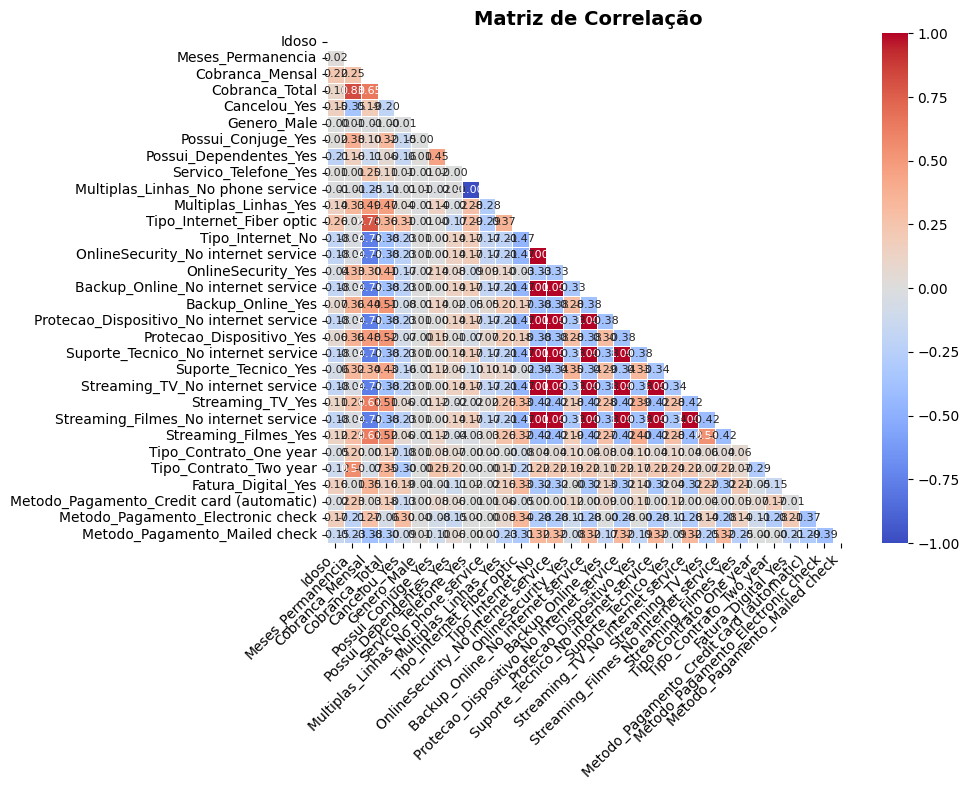

In [25]:
dados_numericos = dados_encoded.select_dtypes(include=[np.number])
correlacao = dados_numericos.corr()
mask = np.triu(np.ones_like(correlacao, dtype=bool))

plt.figure(figsize=(10, 8))
sns.heatmap(
    correlacao,
    mask=mask,
    annot=True,
    cmap='coolwarm',
    fmt='.2f',
    linewidths=0.5,
    annot_kws={"size": 8}
)

plt.title('Matriz de Correlação', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [26]:
correlacao_target = correlacao['Cancelou_Yes'].sort_values(ascending=False)
print(correlacao_target)

Cancelou_Yes                                1.000000
Tipo_Internet_Fiber optic                   0.308020
Metodo_Pagamento_Electronic check           0.301919
Cobranca_Mensal                             0.193356
Fatura_Digital_Yes                          0.191825
Idoso                                       0.150889
Streaming_TV_Yes                            0.063228
Streaming_Filmes_Yes                        0.061382
Multiplas_Linhas_Yes                        0.040102
Servico_Telefone_Yes                        0.011942
Genero_Male                                -0.008612
Multiplas_Linhas_No phone service          -0.011942
Protecao_Dispositivo_Yes                   -0.066160
Backup_Online_Yes                          -0.082255
Metodo_Pagamento_Mailed check              -0.091683
Metodo_Pagamento_Credit card (automatic)   -0.134302
Possui_Conjuge_Yes                         -0.150448
Possui_Dependentes_Yes                     -0.164221
Suporte_Tecnico_Yes                        -0.

In [27]:
dados_encoded.drop([ 'Genero_Male', 'Servico_Telefone_Yes', 'Multiplas_Linhas_No phone service'], axis=1, inplace=True)

/tmp/ipython-input-1359258666.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


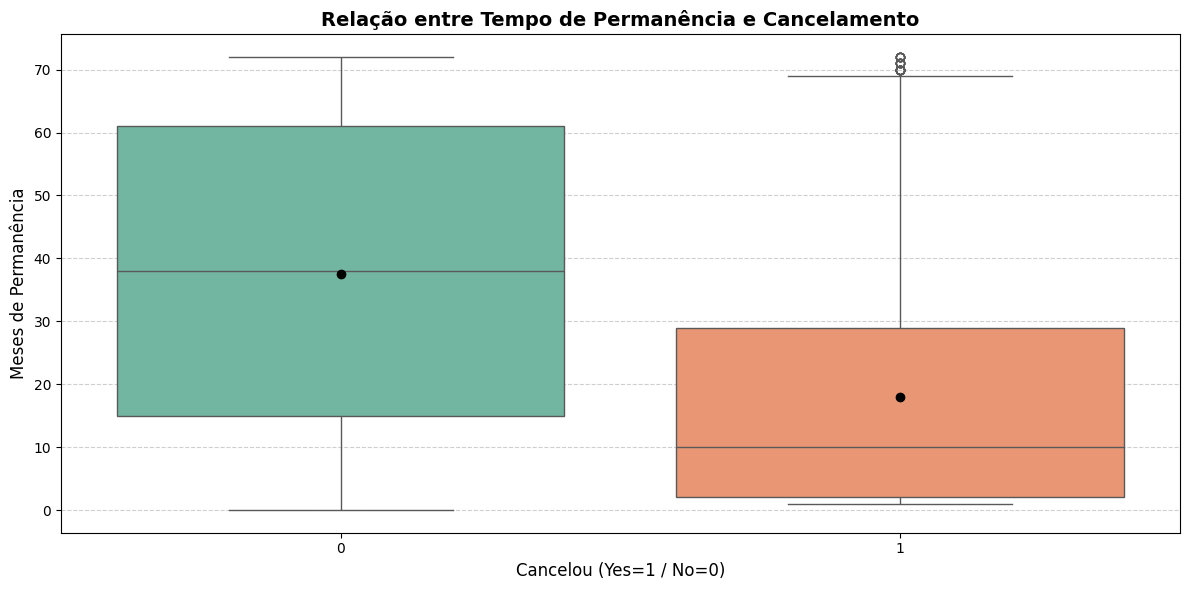

In [29]:
dados_encoded['Cancelou_Yes'] = dados_encoded['Cancelou_Yes'].astype('category')

plt.figure(figsize=(12, 6))
sns.boxplot(
    x="Cancelou_Yes",
    y="Meses_Permanencia",
    data=dados_encoded,
    palette="Set2",
    showmeans=True,
    meanprops={"marker": "o", "markerfacecolor": "black", "markeredgecolor": "black"}
)

plt.title('Relação entre Tempo de Permanência e Cancelamento', fontsize=14, fontweight='bold')
plt.xlabel('Cancelou (Yes=1 / No=0)', fontsize=12)
plt.ylabel('Meses de Permanência', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

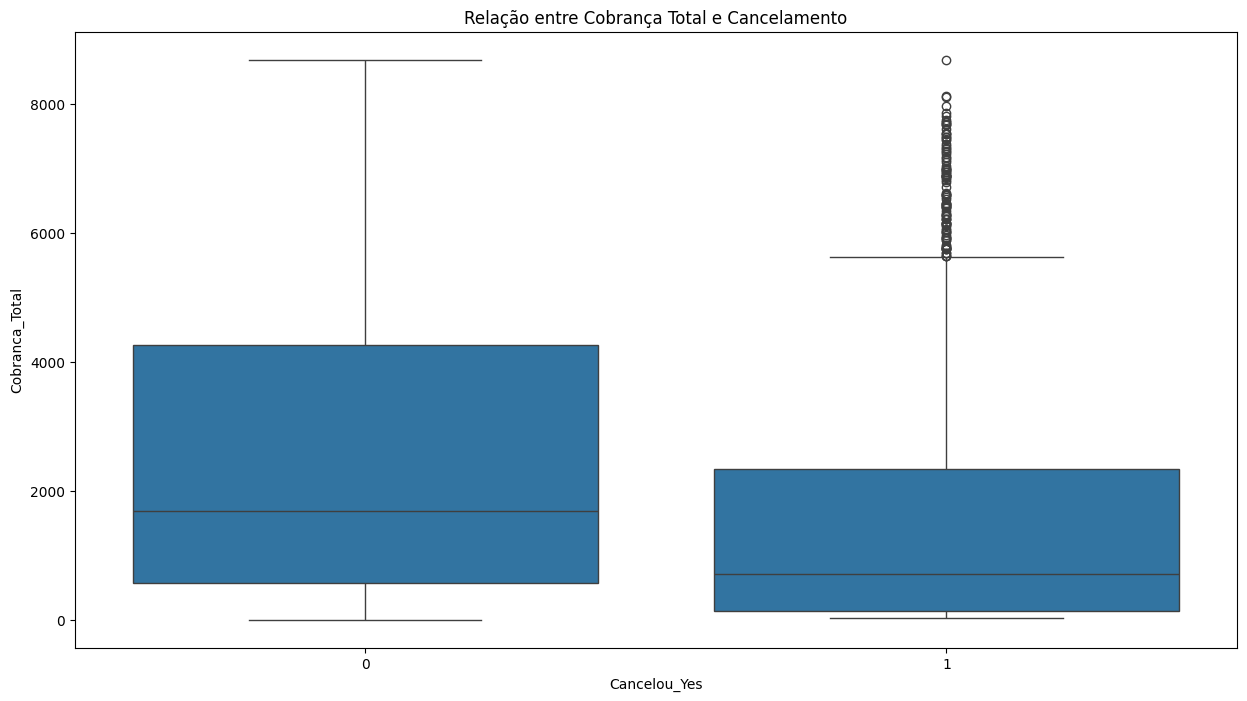

In [32]:
dados_encoded['Cancelou_Yes'] = dados_encoded['Cancelou_Yes'].astype('category')

plt.figure(figsize=(15, 8))
sns.boxplot(x="Cancelou_Yes", y="Cobranca_Total", data=dados_encoded)
plt.title('Relação entre Cobrança Total e Cancelamento')
plt.show()

In [33]:
dados_encoded.columns
dados_encoded.drop('ID_Cliente', axis=1, inplace=True)

In [34]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

In [35]:
X = dados_encoded.drop('Cancelou_Yes', axis=1)
y = dados_encoded['Cancelou_Yes']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

smote= SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)
print(y_train_res.value_counts())

Cancelou_Yes
0    3622
1    3622
Name: count, dtype: int64


In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

best_params = {'class_weight': 'balanced', 'max_depth': 15, 'min_samples_split': 2, 'n_estimators': 100}
modelo = RandomForestClassifier(random_state=42, **best_params)

modelo.fit(X_train_res, y_train_res)

y_pred= modelo.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.81      0.83      1552
           1       0.55      0.65      0.60       561

    accuracy                           0.77      2113
   macro avg       0.71      0.73      0.72      2113
weighted avg       0.78      0.77      0.77      2113



In [37]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [38]:
scaler = StandardScaler()
X_train_res_scaled = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test)

modelo_knn = KNeighborsClassifier(n_neighbors=5)
modelo_knn.fit(X_train_res_scaled, y_train_res)

Y_pred_knn = modelo_knn.predict(X_test_scaled)

print(classification_report(y_test, Y_pred_knn))

              precision    recall  f1-score   support

           0       0.85      0.77      0.81      1552
           1       0.49      0.61      0.55       561

    accuracy                           0.73      2113
   macro avg       0.67      0.69      0.68      2113
weighted avg       0.75      0.73      0.74      2113



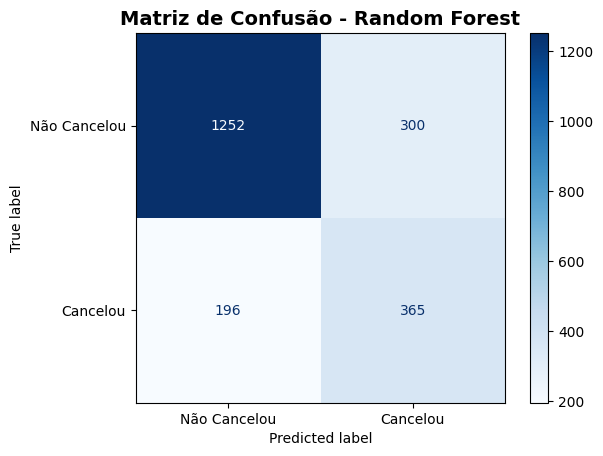

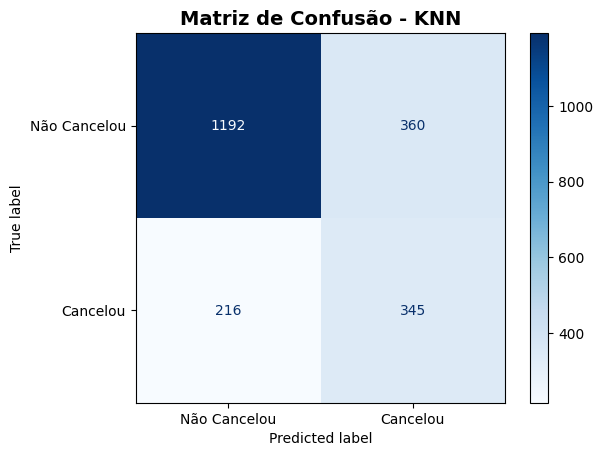

In [47]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def plot_conf_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Não Cancelou', 'Cancelou'])
    disp.plot(cmap='Blues', values_format='d')
    plt.title(title, fontsize=14, fontweight='bold')
    plt.grid(False)
    plt.show()

plot_conf_matrix(y_test, y_pred, 'Matriz de Confusão - Random Forest')
plot_conf_matrix(y_test, Y_pred_knn, 'Matriz de Confusão - KNN')


Métricas Random Forest - Treino

              precision    recall  f1-score   support

Não Cancelou       1.00      0.93      0.96      3622
    Cancelou       0.93      1.00      0.96      3622

    accuracy                           0.96      7244
   macro avg       0.97      0.96      0.96      7244
weighted avg       0.97      0.96      0.96      7244



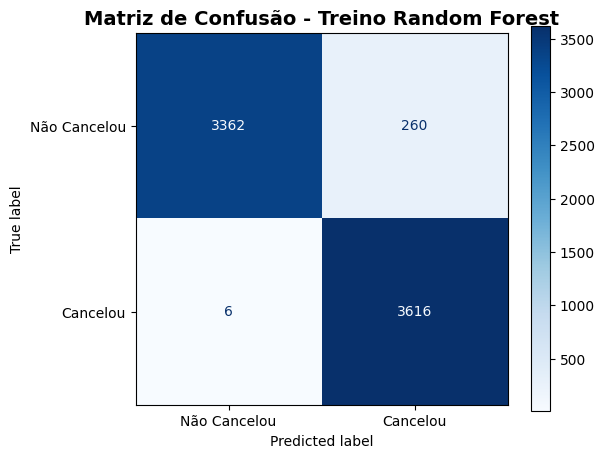

In [48]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

print('Métricas Random Forest - Treino\n')

y_train_pred_rf = modelo.predict(X_train_res)

print(classification_report(y_train_res, y_train_pred_rf, target_names=['Não Cancelou', 'Cancelou']))

cm_rf_train = confusion_matrix(y_train_res, y_train_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf_train, display_labels=['Não Cancelou', 'Cancelou'])

plt.figure(figsize=(6, 5))
disp.plot(cmap='Blues', values_format='d', ax=plt.gca())
plt.title('Matriz de Confusão - Treino Random Forest', fontsize=14, fontweight='bold')
plt.grid(False)
plt.show()


=== MÉTRICAS KNN - TREINO ===

              precision    recall  f1-score   support

Não Cancelou       0.89      0.84      0.86      3622
    Cancelou       0.84      0.89      0.87      3622

    accuracy                           0.87      7244
   macro avg       0.87      0.87      0.87      7244
weighted avg       0.87      0.87      0.87      7244



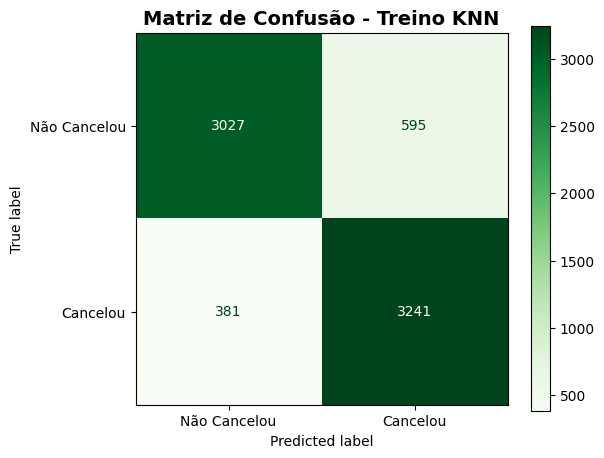

In [49]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

print("=== MÉTRICAS KNN - TREINO ===\n")

y_train_pred_knn = modelo_knn.predict(X_train_res_scaled)

print(classification_report(y_train_res, y_train_pred_knn, target_names=['Não Cancelou', 'Cancelou']))

cm_knn_train = confusion_matrix(y_train_res, y_train_pred_knn)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_knn_train, display_labels=['Não Cancelou', 'Cancelou'])

plt.figure(figsize=(6, 5))
disp.plot(cmap='Greens', values_format='d', ax=plt.gca())
plt.title('Matriz de Confusão - Treino KNN', fontsize=14, fontweight='bold')
plt.grid(False)
plt.show()


/tmp/ipython-input-3881907767.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importância', y='Variável', data=df_importancia, palette='viridis')


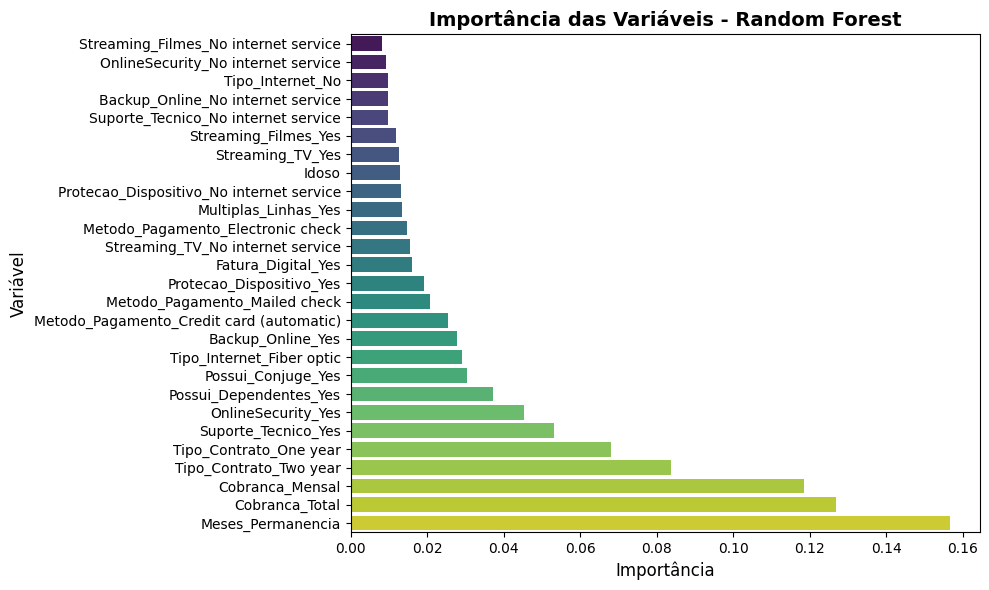

In [50]:
importancias = modelo.feature_importances_
variaveis = X_train.columns

df_importancia = pd.DataFrame({
    'Variável': variaveis,
    'Importância': importancias
}).sort_values(by='Importância', ascending=True)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importância', y='Variável', data=df_importancia, palette='viridis')
plt.title('Importância das Variáveis - Random Forest', fontsize=14, fontweight='bold')
plt.xlabel('Importância', fontsize=12)
plt.ylabel('Variável', fontsize=12)
plt.tight_layout()
plt.show()


# Relatório de Insights e Estratégias

Relatório de Insights e Estratégias de Retenção de Clientes

Principais Conclusões

Duração do Contrato e Permanência: Clientes com contratos de curta duração e menor tempo de permanência apresentam maior tendência a cancelar. O monitoramento nos primeiros meses é crítico para reduzir a evasão.

Serviços Complementares Favorecem a Fidelidade: A utilização de serviços adicionais, como Suporte Técnico e Segurança Online, está associada a maior retenção. Clientes sem esses serviços mostram maior risco de cancelamento.

Observação sobre Internet Fibra Óptica: Surpreendentemente, clientes que utilizam fibra óptica apresentam uma taxa maior de evasão. Isso sugere que fatores como qualidade do serviço, preço ou concorrência devem ser analisados mais profundamente.

Impacto do Perfil Familiar: A presença de cônjuge ou dependentes vinculados à conta reduz a probabilidade de churn, indicando que laços familiares podem aumentar a fidelidade do cliente.

Resultados dos Modelos Preditivos

Random Forest como Principal Ferramenta: Entre os modelos testados, o Random Forest se destacou, conseguindo identificar com precisão cerca de 65% dos clientes que efetivamente cancelaram. Isso demonstra sua eficácia na detecção de clientes em risco.

Variáveis Mais Relevantes: Os preditores mais influentes incluem:

*   Meses de permanência (tempo com a empresa)
*   Tipo de contrato (mensal, anual, bienal)
*   Adoção de serviços complementares